## Task 1: Implement and train a CNN [2pt] 
Load the CIFAR10 train and test dataset. Implement a convolutional neural network (follow the standard structure for a neural network class and implement a training loop in whichever way you wish). Train the CNN on the CIFAR10 dataset. Present the train and test accuracy (print these out in the usual way). You are free to choose the model architecture as you wish, but use only convolutional and fully-connected layers. Make sure to achieve an accuracy of above 60% on the test set.


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 75/75 [07:40<00:00,  6.14s/it]


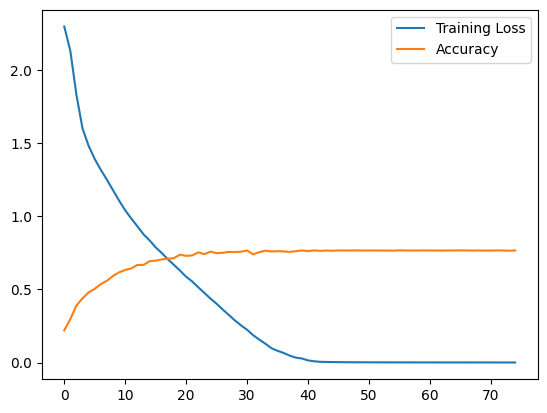

Accuracy on the test dataset: 76 %
Finished Training


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from tqdm import tqdm
import matplotlib.pyplot as plt

# Load CIFAR10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def train(model, trainloader, criterion, optimizer, epoch_size, device, save_model_name, testloader):
    best_loss = float('inf')
    loss_list = []
    acc_list = []
    for epoch in tqdm(range(epoch_size)):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a        # get the inputs; data is a tuple of (inputs, labels)
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

        if running_loss < best_loss:
            best_loss = running_loss
            torch.save(model.state_dict(), save_model_name)

        acc =  validate(model, testloader, device)
        acc_list.append(acc)
        loss_list.append(running_loss/len(trainloader))

    plt.plot(loss_list, label='Training Loss')
    plt.plot(acc_list, label='Accuracy')
    plt.legend()
    plt.show()

def validate(model, testloader, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total
    print('Accuracy on the test dataset: %d %%' % (
                100 * correct / total))

# Define CNN model
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(4*4*256, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(torch.relu((self.conv1(x))))
        x = self.pool2(torch.relu((self.conv2(x))))
        x = self.pool3(torch.relu((self.conv3(x))))
        x = x.view(-1, 4*4*256)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
cnn_net = CNN_Net().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.SGD(cnn_net.parameters(), lr=0.001, momentum=0.9)

epoch_size = 75
save_model_name = "best_model_cnn.pth"

train(cnn_net, trainloader, criterion, cnn_optimizer, epoch_size, device, save_model_name, testloader)
cnn_net.load_state_dict(torch.load(save_model_name))

print('Accuracy on the test dataset: %d %%' % (
                100 * validate(cnn_net, testloader, device)))
print('Finished Training')


## Task 2: Dropout [2pt] 
Explain what dropout does. Then, add dropout layers to your model using torch.nn.Dropout. Use the dropout layers in your forward call. What kind of results do you observe? Does dropout help with generalisation? Does the location where you place the dropout layer matter?

Answer: 
- Dropout is a regularization technique used in neural networks to prevent overfitting. During training, it randomly removes some neurons in the network with a certain probability. Some neurons are randomly removed during each training, and because they are randomly discarded, each mini-batch is training a different network.
- During the training process, I found that after adding Dropout, the overall effect has not been significantly improved, but the training curve has changed to a certain extent, and the loss function has dropped to a smoother level. And the convergence speed is a little faster.

- The position where dropout is added and the parameters set have an impact on the final result. If the parameters are not set well, it will reduce the final result. Moreover, it is best not to increase dropout in the last few layers, which is also bad for the network.

100%|██████████| 75/75 [07:52<00:00,  6.30s/it]


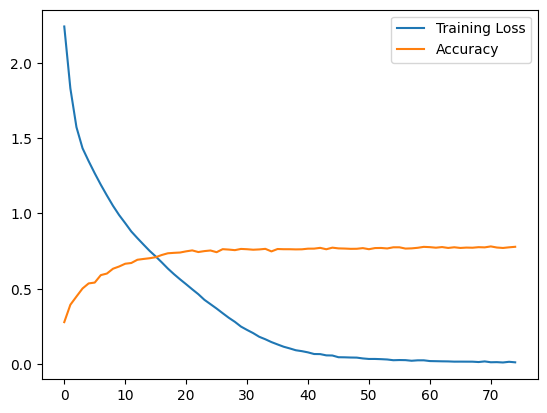

Accuracy on the test dataset: 77 %
Finished Training


In [23]:
class CNN_Net_dropout(nn.Module):
    def __init__(self):
        super(CNN_Net_dropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.dropout1 = nn.Dropout(p=0.2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.dropout2 = nn.Dropout(p=0.2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.dropout3 = nn.Dropout(p=0.2)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(4*4*256, 512)
        self.dropout4 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(512, 128)
        self.dropout5 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.dropout1(self.conv1(x))))
        x = self.pool2(torch.relu(self.dropout2(self.conv2(x))))
        x = self.pool3(torch.relu(self.dropout3(self.conv3(x))))

        x = x.view(-1, 4*4*256)
        x = (torch.relu(self.fc1(x)))
        x = (torch.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

cnn_net_dropout = CNN_Net_dropout().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
cnn_dropout_optimizer = optim.SGD(cnn_net_dropout.parameters(), lr=0.001, momentum=0.9)

save_model_name = "best_model_cnn_dropout.pth"
train(cnn_net_dropout, trainloader, criterion, cnn_dropout_optimizer, epoch_size, device, save_model_name, testloader)
cnn_net_dropout.load_state_dict(torch.load(save_model_name))
print('Accuracy on the test dataset: %d %%' % (
                100 * validate(cnn_net_dropout, testloader, device)))
print('Finished Training')

## Task 3: BatchNorm [2pt] 
Explain what BatchNorm does. Then, add batchnorm layers to your model using e.g. torch.nn.BatchNorm2d. Similar to dropout, analyse the performance.

Answer: 
- BatchNorm is a way to unify scattered data, and it is also a way to optimize neural networks. Because the data with uniform specifications makes it easier for machine learning to learn the laws in the data. After adding BatchNorm, the model can learn faster and more stable.
- After I added BatchNorm to the source network, the final effect of the model was improved by 2%, and in the training fitting curve, the convergence speed of the model was significantly improved, and it was close to the best accuracy within 10 epochs. 

100%|██████████| 75/75 [08:17<00:00,  6.63s/it]


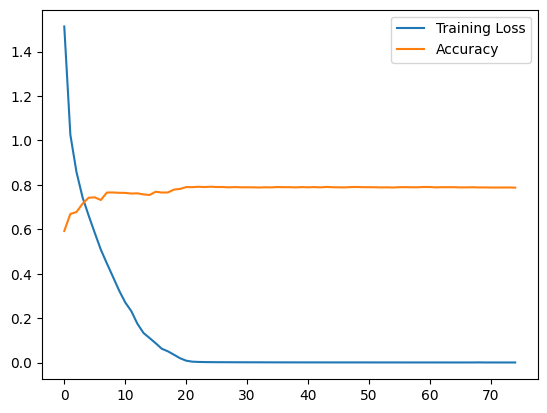

Accuracy on the test dataset: 78 %
Finished Training


In [24]:
class CNN_Net_norm(nn.Module):
    def __init__(self):
        super(CNN_Net_norm, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(4*4*256, 512)

        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 4*4*256)
        x = (torch.relu(self.fc1(x)))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
cnn_net_norm = CNN_Net_norm().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
cnn_norm_optimizer = optim.SGD(cnn_net_norm.parameters(), lr=0.001, momentum=0.9)

save_model_name = "best_model_cnn_norm.pth"

train(cnn_net_norm, trainloader, criterion, cnn_norm_optimizer, epoch_size, device, save_model_name, testloader)
cnn_net_norm.load_state_dict(torch.load(save_model_name))
print('Accuracy on the test dataset: %d %%' % (
                100 * validate(cnn_net_norm, testloader, device)))
print('Finished Training')

## Task 1: Load an image [1pt] 
We will begin with loading an image. Make sure you install all the needed libraries. We will use the below code. Add code that will display the loaded input image.

Answer: 
- I add the code "display(input_image)”, and the load image has been displayed.

In [1]:
from PIL import Image
from torchvision import transforms
from IPython.display import display
import matplotlib.pyplot as plt
filename = "dog.jpeg"
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) 

# display the loaded input image.
plt.show(input_image)

## Task 2: Load the pre-trained model and write code to allow for a ’hook’ [2pt] 
We will load the Inception-V3 model using the following code:

In [2]:
import torch
import torchvision.models as models

# Load the pre-trained Inception-V3 model
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = models.inception_v3(pretrained=True).to(device)
model = model.eval()

Can you explain in your own words what this code does? Hint: you may need to look on e.g. stackoverflow or in the PyTorch documentation.

In [3]:
outputs= []
def hook(module, input, output):
    outputs.append(output)

Answer:
- When calling forward() on a PyTorch network, all submodules are also called recursively. For any submodule it is possible to register a "hook" function that is called during the forward pass, which is called during the input and output of the corresponding layer.

- This function has three parameters: module, input and output, where the output parameter is the intermediate activation of the module, which we want to extract. The outputs list is used to collect and store these intermediate activations.

## Task 3: Create a hook [1pt] 
To obtain the values of the activations when passing a certain input, we need to know which layer’s outputs we want. You can check the different layers here: https://github.com/pytorch/vision/blob/main/torchvision/models/inception.pyforlayers. Create a hook for a layer of your choice using

In [4]:
layer_names = []
for name, module in model._modules.items():
    # layer_names.append(name)
    print (name)
# print(layer_names)
layer_names = ["Mixed_6a"]

hooks = []
for layer_name in layer_names:
    layer = model._modules.get(layer_name)
    hook_handle = layer.register_forward_hook(hook)
    hooks.append(hook_handle)

Conv2d_1a_3x3
Conv2d_2a_3x3
Conv2d_2b_3x3
maxpool1
Conv2d_3b_1x1
Conv2d_4a_3x3
maxpool2
Mixed_5b
Mixed_5c
Mixed_5d
Mixed_6a
Mixed_6b
Mixed_6c
Mixed_6d
Mixed_6e
AuxLogits
Mixed_7a
Mixed_7b
Mixed_7c
avgpool
dropout
fc


## Task 4: Implement the deepdream optimisation loop [4.5pt] 
We will use gradient ascent to optimise for the norm of the activation. Implement a function that performs this gradient ascent. 
This function will take as input the number of iterations to perform, the learning rate, and the start image (i.e. the image which the model will enhance). 
Define in the function a for loop over the number of iterations, obtain the model output, get the output of the hook (hint: use something like outputs[-1]), compute the loss which will be L2 norm of this output (i.e. the L2 norm of the activations from your chosen layer), compute the gradients of this L2 norm loss, scale the gradients by their absolute average (hint: scale using torch.abs(g).mean()) and define a gradient ascent step over the image. Do not forget to zero out gradients where needed.

In [5]:
def gradient_ascent(model, img, num_iterations, learning_rate):
    for _ in range(num_iterations):
        model.zero_grad()
        model(img)
        loss = torch.tensor(0.0).to(device)
        # compute L2 norm
        activation = outputs[-1].view(-1)
        loss += torch.norm(activation, p=2)

        gradients = torch.autograd.grad(loss, img, only_inputs=True)[0]
        gradients = gradients / torch.abs(gradients).mean()

        img = img + gradients * learning_rate
        img = torch.clamp(img, -1, 1)

    return loss, img

## Task 5: Present comparisons of outputs [3pt] 
Implement code to display the output from your optimisation loop (using e.g. numpy). Present the generated images for different choices of layer activations and different number of optimisation steps. Discuss your results. What is the impact of using different layers? What is the impact of the number of optimisation steps?

Answer:
- I wrote a function "generate_deepdream" to test the input image, which can be passed different iteration number parameters. And, we show the result images of num iterations = [20, 50, 100], activation layer = “Mixed_6a” respectively; and num iterations = 50 activation layer = [“Mixed_6a”, “Mixed_7a”, “Conv2d_3b_1x1”, “AuxLogits " ] result image
- Using different layers has a relatively small impact on the display results, and requires careful observation to find out
- the impact of the number of optimization steps is the greater the number, the more pronounced the result

In [6]:

import numpy as np

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def postprocess(image_np, ):
    image_np = image_np.squeeze().transpose(1, 2, 0)
    image_np = image_np * std.reshape((1, 1, 3)) + mean.reshape((1, 1, 3))
    image_np = np.clip(image_np, 0.0, 255.0)
    return image_np

def clip(image_tensor):
    for c in range(3):
        m, s = mean[c], std[c]
        image_tensor[0, c] = torch.clamp(image_tensor[0, c], -m / s, (1 - m) / s)
    return image_tensor

def generate_deepdream(model, img, num_iterations=100, learning_rate=1e-2 ):
    img = img.to(device)
    img.requires_grad_(True)
    learning_rate = torch.tensor(learning_rate).to(device)

    loss, img = gradient_ascent(model, img, num_iterations, learning_rate)
    result = postprocess(img.cpu().data.numpy())

    return result

- display enhanced image after different number of optimisat·ion steps 

[]


/home/zy/.conda/envs/pytorch1.6/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Text(0.5, 1.0, 'num iterations = 20, the activation layer is "Mixed_6a" ')

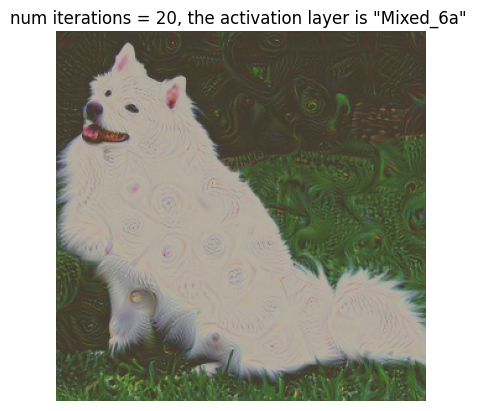

In [7]:
print(outputs)
enhanced_image = generate_deepdream(model, input_batch, num_iterations  = 20)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 20, the activation layer is \"Mixed_6a\" ")

Text(0.5, 1.0, 'num iterations = 50, the activation layer is "Mixed_6a" ')

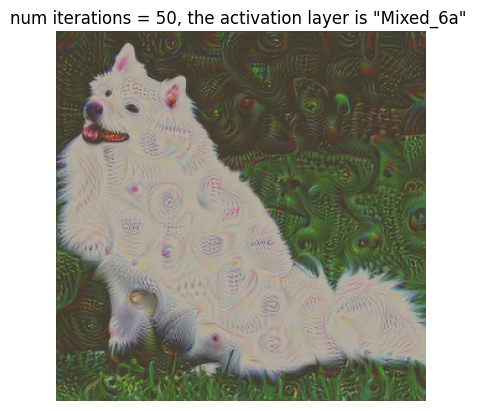

In [8]:
enhanced_image = generate_deepdream(model, input_batch, num_iterations  = 50)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 50, the activation layer is \"Mixed_6a\" ")

Text(0.5, 1.0, 'num iterations = 100, the activation layer is "Mixed_6a" ')

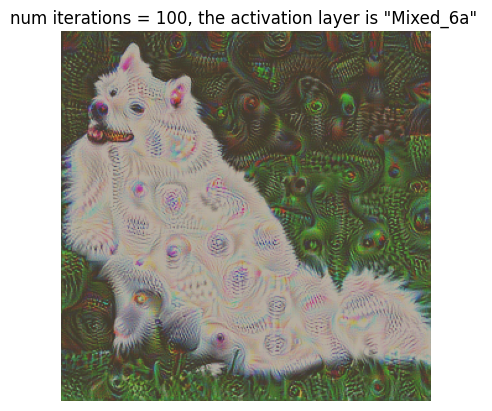

In [9]:
enhanced_image = generate_deepdream(model, input_batch, num_iterations  = 100)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 100, the activation layer is \"Mixed_6a\" ")

- display enhanced image with different layer activations

Text(0.5, 1.0, 'num iterations = 50, the activation layer is Mixed_7a')

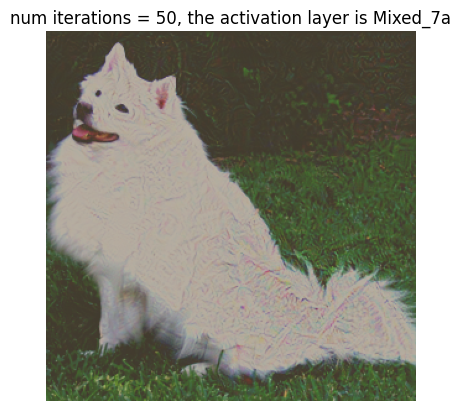

In [10]:
new_layer_name = "Mixed_7a"
layer = model._modules.get(new_layer_name)
hook_handle = layer.register_forward_hook(hook)
hooks.append(hook_handle)
enhanced_image = generate_deepdream(model, input_batch, num_iterations  = 50)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 50, the activation layer is " + new_layer_name )

Text(0.5, 1.0, 'num iterations = 50, the activation layer is AuxLogits')

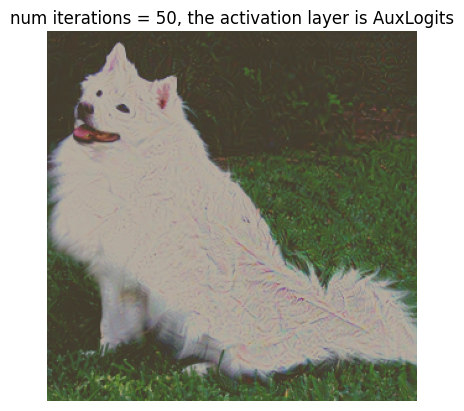

In [11]:
new_layer_name = "AuxLogits"
layer = model._modules.get(new_layer_name)
hook_handle = layer.register_forward_hook(hook)
hooks.append(hook_handle)
enhanced_image = generate_deepdream(model, input_batch, num_iterations  = 50)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 50, the activation layer is " + new_layer_name )

Text(0.5, 1.0, 'num iterations = 50, the activation layer is Conv2d_3b_1x1')

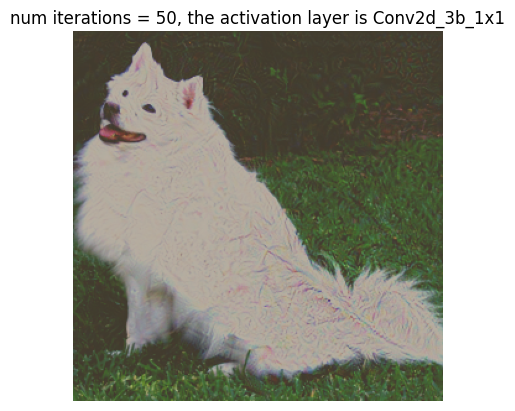

In [12]:
new_layer_name = "Conv2d_3b_1x1"
layer = model._modules.get(new_layer_name)
hook_handle = layer.register_forward_hook(hook)
hooks.append(hook_handle)
enhanced_image = generate_deepdream(model, input_batch, num_iterations  = 50)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 50, the activation layer is " + new_layer_name )

## Task 6: Improve the results by allowing to optimise for multiple layer activations [1.5pt] 

In our previous setting we registered a single hook and al- lowed for optimising for a single layer’s activation. Can you change the method such that it will allow to compute the loss (L2 norm) of multiple layers’ outputs? You will need to change both the creation of the hook and you will need to change something in the gradient ascent loop.

Answer:
- I modified the gradient_ascent function, the new function is named gradient_ascent_v2, can calculate the loss value of multiple activation layers, and also modified the hook function, you can add multiple activation layers

Text(0.5, 1.0, 'num iterations = 50')

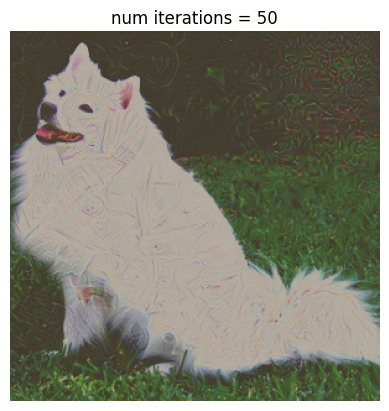

In [13]:
outputs_v2= []
def hook_v2(module, input, output):
    outputs_v2.append(output)

layer_names = []
for name, module in model._modules.items():
    layer_names.append(name)

hooks = []
for layer_name in layer_names:
    layer = model._modules.get(layer_name)
    hook_handle = layer.register_forward_hook(hook_v2)
    hooks.append(hook_handle)

def gradient_ascent_v2(model, img, num_iterations, learning_rate):
    for _ in range(num_iterations):
        model.zero_grad()
        model(img)
        loss = torch.tensor(0.0).to(device)
        # compute L2 norm
        for activation in outputs_v2:
            activation = activation.view(-1)
            loss += torch.norm(activation, p=2)

        gradients = torch.autograd.grad(loss, img, only_inputs=True)[0]
        gradients = gradients / torch.abs(gradients).mean()

        img = img + gradients * learning_rate
        img = torch.clamp(img, -1, 1)

    return loss, img

def generate_deepdream_v2(model, img, num_iterations=100, learning_rate=1e-2 ):
    img = img.to(device)
    img.requires_grad_(True)
    learning_rate = torch.tensor(learning_rate).to(device)

    loss, img = gradient_ascent_v2(model, img, num_iterations, learning_rate)
    result = postprocess(img.cpu().data.numpy())

    return result

enhanced_image = generate_deepdream_v2(model, input_batch, num_iterations  = 50)
plt.imshow(enhanced_image)
plt.axis('off') 
plt.title("num iterations = 50")

## Task 7: Play around with the model and create your own dream [1pt]
Load your own image of choice. Play around with the hyperparameters. Present the dream you like the most. You are free to also improve the method in whichever way you think is useful

Answer:
- I imitat the octaves algorithm, write a program, and get a good result.

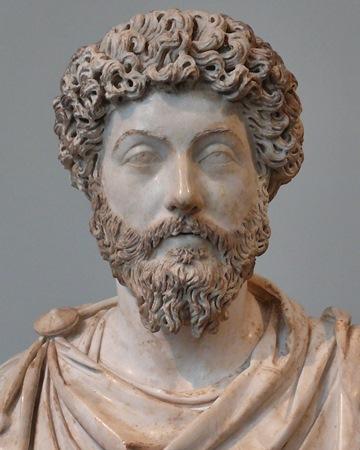

In [14]:
from PIL.Image import Image, open
import PIL

preprocess_v2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]),
])

def deepdream_octaves(original_img, steps_per_octave=50, step_size=1e-2, octaves=range(-2, 1), octave_scale=1.3):
    img = original_img
    base_shape = img.size
    base_shape = torch.tensor(base_shape).float()

    for n in octaves:
        new_shape = base_shape * (octave_scale ** n)
        new_shape = new_shape.int().tolist()
        img = img.resize(new_shape)
        input_tensor = preprocess_v2(img)
        img = input_tensor.unsqueeze(0) 
        
        img = generate_deepdream_v2(model, img, steps_per_octave,)
        
        img = PIL.Image.fromarray(np.uint8(img*255))
        img.save("result_img" + str(n) + ".jpg")
        
        
    return img.resize(original_img.size)

img_path = "test.jpg"
original_img = open(img_path).convert("RGB")
original_img


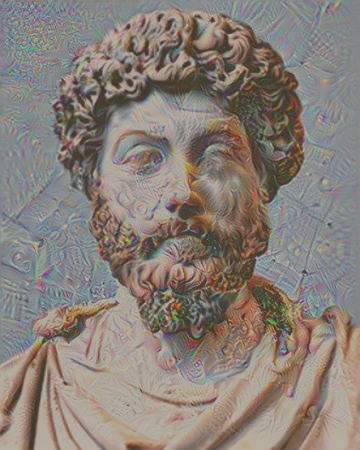

In [15]:
result_img = deepdream_octaves(original_img)
plt.show(result_img)
result_img